In [1]:
import numpy as np
import sys
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Normalization, Input
from tensorflow.keras import optimizers

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
(AX,AY), (QX,QY) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# fazer uma analise exploratoria dos dados
categorias=["Camiseta", "Calça", "Pulôver", "Vestido", "Casaco", "Sandália", "Camisa", "Tênis", "Bolsa", "Botins"]
print(AX.shape)
print(QX.shape)
print(AY.shape)
print(QY.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


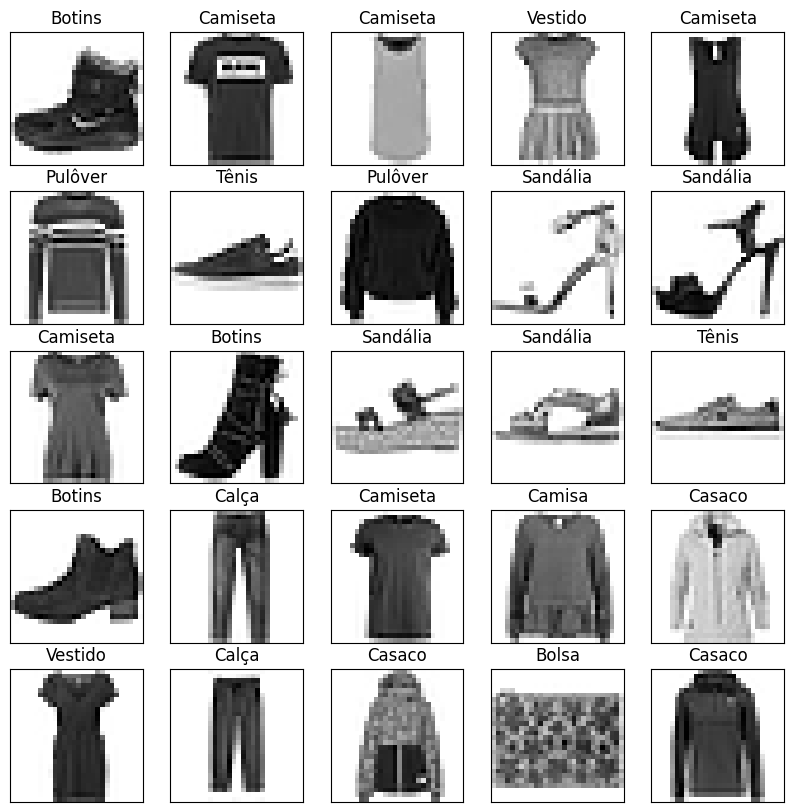

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(AX[i], cmap=plt.cm.binary)
    plt.title(categorias[AY[i]])
plt.show()

In [ ]:
# transforma as labels para caracteristicas categoricas
nclasses = 10
AY2 = keras.utils.to_categorical(AY, nclasses)
QY2 = keras.utils.to_categorical(QY, nclasses)
nl, nc = AX.shape[1], AX.shape[2]

In [ ]:
# Cria a rede neural
model = Sequential(); model.add(Input(shape=(nl,nc)))
model.add(Normalization()) #Normaliza
model.add(Flatten())
model.add(Dense(400, activation='gelu'))
model.add(Dense(100, activation='gelu'))
model.add(Dense(nclasses, activation='softmax'))

In [ ]:
opt=optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.get_layer(index=0).adapt(AX)
model.fit(AX,AY2, batch_size=128, epochs=60, validation_data=(QX,QY2))

Epoch 1/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8039 - loss: 0.5567 - val_accuracy: 0.8634 - val_loss: 0.3800
Epoch 2/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8861 - loss: 0.3072 - val_accuracy: 0.8769 - val_loss: 0.3425
Epoch 3/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9013 - loss: 0.2599 - val_accuracy: 0.8814 - val_loss: 0.3315
Epoch 4/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9134 - loss: 0.2325 - val_accuracy: 0.8739 - val_loss: 0.3437
Epoch 5/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9216 - loss: 0.2133 - val_accuracy: 0.8843 - val_loss: 0.3436
Epoch 6/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9298 - loss: 0.1875 - val_accuracy: 0.8865 - val_loss: 0.3345
Epoch 7/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9369 - loss: 0.1700 - val_accuracy: 0.8937 - val_loss: 0.3303
Epoch 8/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9422 - loss: 0.1542 - val_accuracy: 0.

In [ ]:
score = model.evaluate(QX, QY2, verbose=0)
print('Test loss: %.4f'%(score[0]))
print('Test accuracy: %.2f %%'%(100*score[1]))
print('Test error: %.2f %%'%(100*(1-score[1])))
QP2 = model.predict(QX)
QPC = np.argmax(QP2, axis=1)
model.save('mlp2.keras')

Test loss: 0.8836
Test accuracy: 89.33 %
Test error: 10.67 %
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


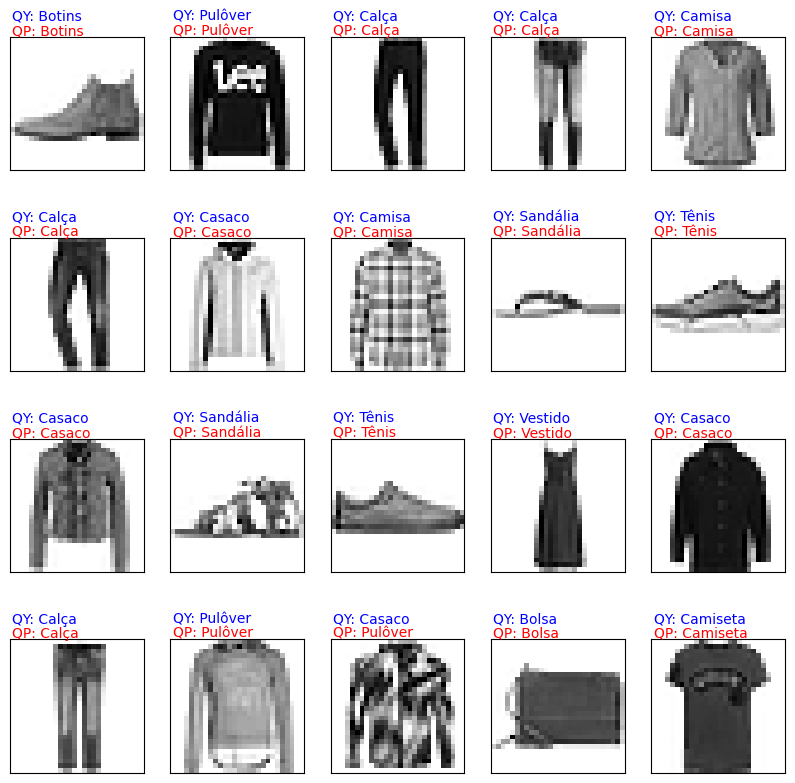

In [ ]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(QX[i], cmap=plt.cm.binary)
    plt.text(0,-4,"QY: " + categorias[QY[i]], color='blue')
    plt.text(0,-1,"QP: " + categorias[QPC[i]], color='red')
plt.show()